In [1]:
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [8]:
data_diabetes = pd.read_table('patients_data.txt',sep='\t',header=None)
classes_diabetes = pd.read_table('patients_classes.txt',sep='\t',header=None)

In [9]:
data_diabetes

,0,1,2,3
0,51.650893,9.679493,0,0
1,64.627752,7.970522,0,1
2,69.550752,6.368363,1,0
3,65.270695,8.812844,0,1
4,62.681176,10.322206,1,1
...,...,...,...,...
195,45.200346,7.315751,0,1
196,46.261624,6.520131,0,0
197,41.424692,5.772244,0,1
198,43.681741,7.993931,0,1


In [10]:
X = np.array(data_diabetes)

In [11]:
classes_diabetes

,0
0,1
1,1
2,1
3,1
4,1
...,...
195,0
196,0
197,0
198,0


In [6]:
y = np.array(classes_diabetes).ravel()

In [29]:
sum(y == 0)

100

# **Decision tree**

In [49]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X, y)

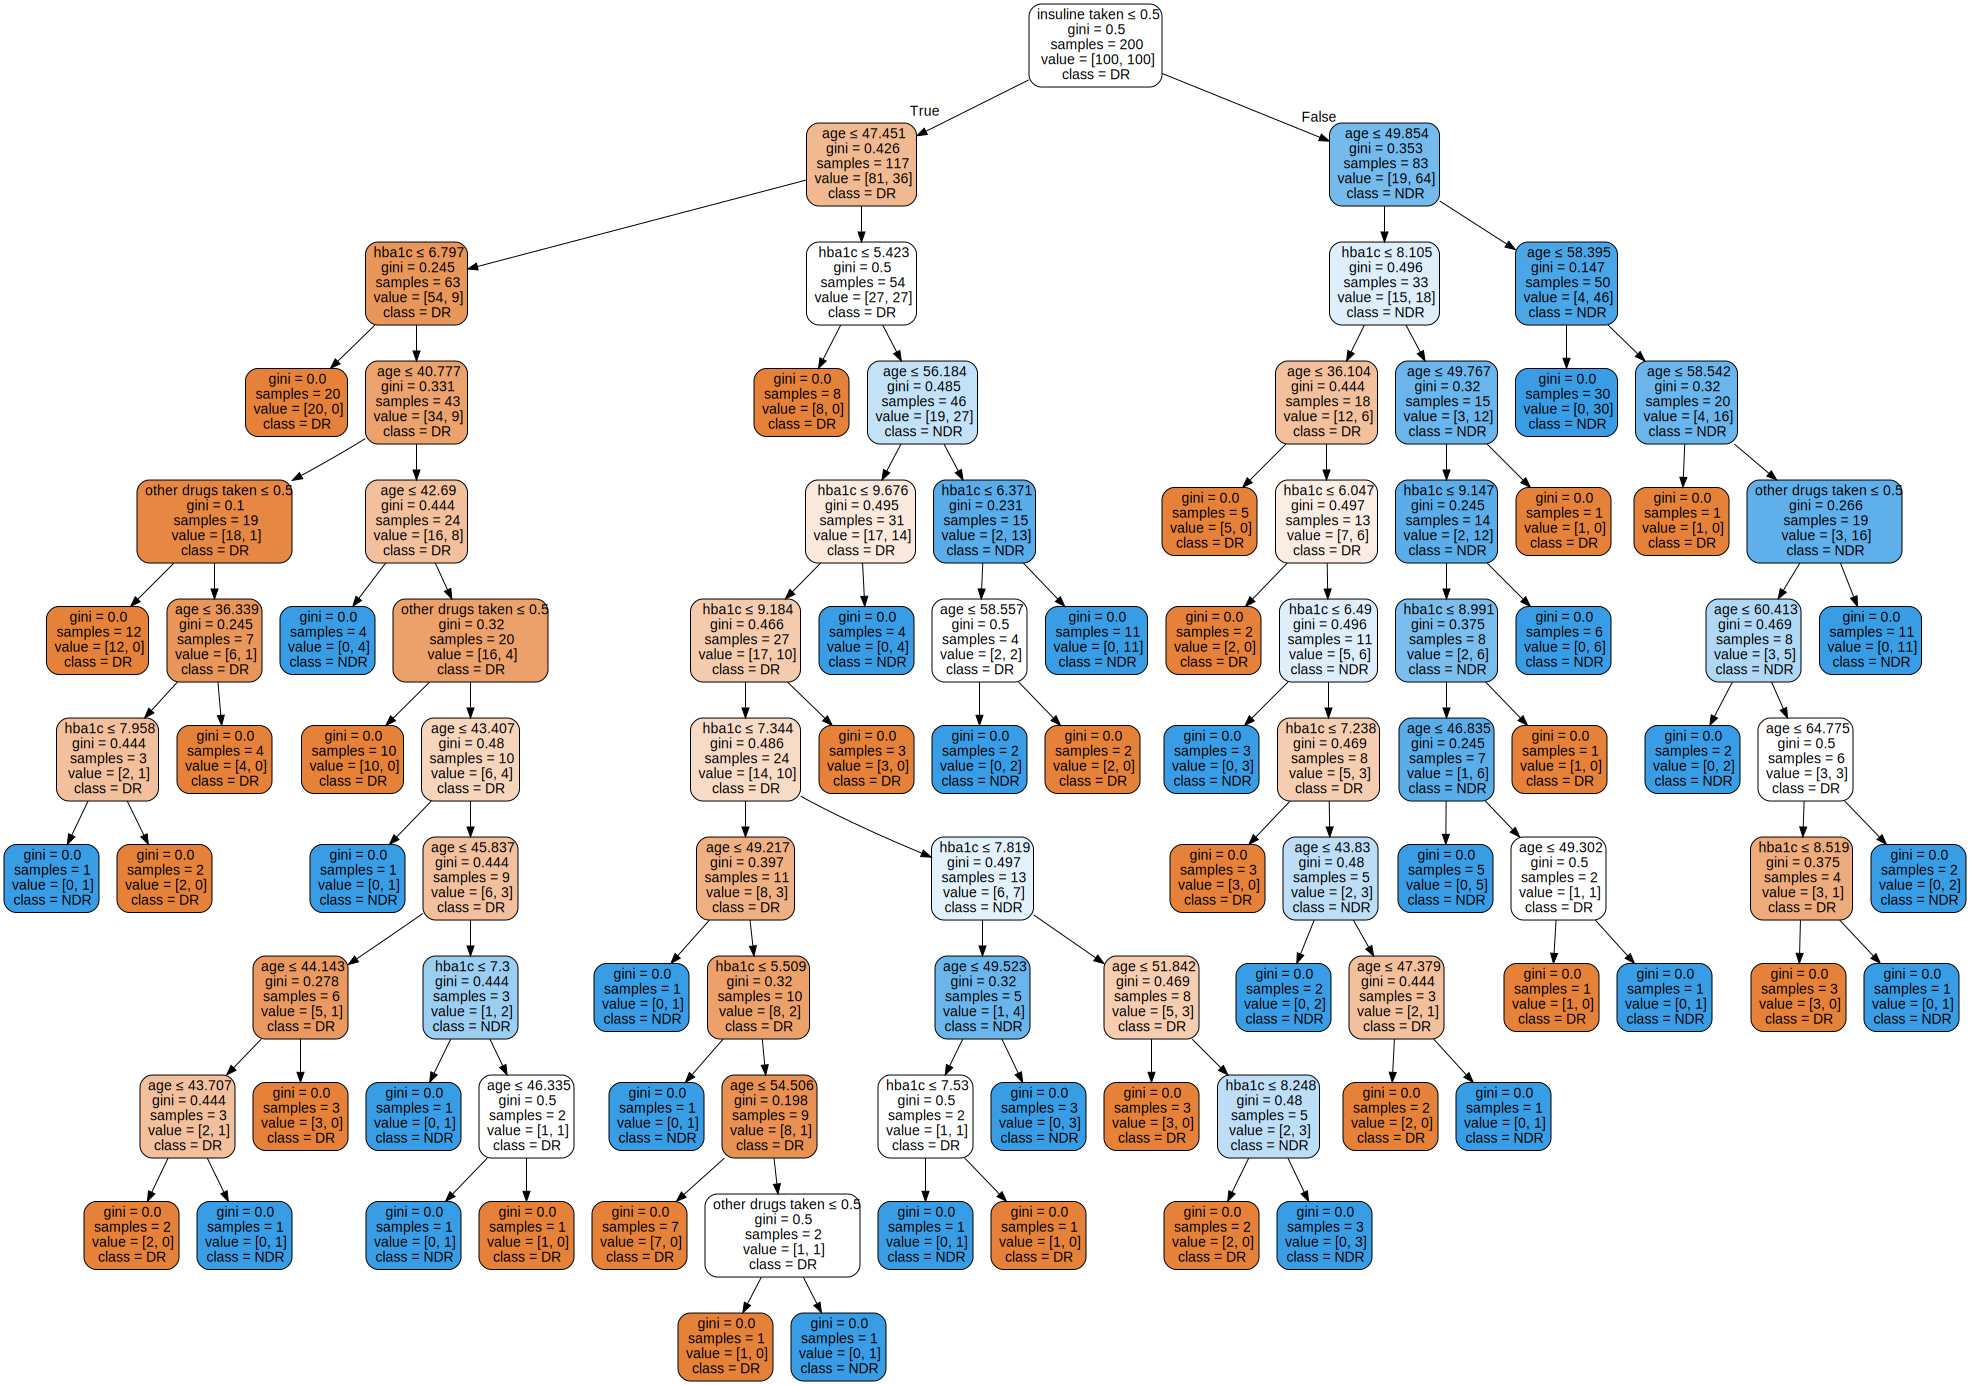

In [50]:
feature_names = ['age', 'hba1c', 'insuline taken', 'other drugs taken']
classes = ['DR','NDR']
dot_data = tree.export_graphviz(clf_tree, out_file=None,
                                             feature_names=feature_names,
                                             class_names=classes,
                                             filled=True,
                                             rounded=True,
                                             special_characters=True)

graph = graphviz.Source(dot_data)
graph
# graph.render("diabetes remission")

## Feature importances
Feature importances represent the importances of features for generate our decision three or our random forest.

In [51]:
clf_tree.feature_importances_

array([0.44736392, 0.30327884, 0.20852641, 0.04083083])

In [53]:
clf_tree.score(X, y)

1.0

## Conclusion
The decision tree predict tree with no depth contraint can predict perfectly training set, but this could be an overfitting.

# **Random forest**

In [21]:
clf_RF.feature_importances_

array([0.46472772, 0.12500739, 0.32924586, 0.08101903])

In [65]:
clf_RF = RandomForestClassifier(max_depth=3, random_state=0)
clf_RF.fit(X, y)

RandomForestClassifier(max_depth=3, random_state=0)

In [66]:
clf_RF.score(X, y)

0.83

But here, we observe that when we predict the training set with random forest, it has lower precision.

# **Diabetes Remission score**

In [74]:
X.shape

(200, 4)

In [75]:
X[:, 0] >=60

array([False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [76]:
len(X)

200

In [35]:
def DiaRem(data):
  score = np.zeros(len(data))

  score[data[:, 0] >= 60] += 3
  score[(data[:, 0] >= 50) & (data[:, 0] < 60)] += 2
  score[(data[:, 0] >= 40) & (data[:, 0] < 50)] += 1

  score[(data[:, 1] >= 6.5) & (data[:, 1] < 7)] += 2
  score[(data[:, 1] >= 7) & (data[:, 1] < 9)] += 4
  score[data[:, 1] >= 9] += 6

  score[data[:, 3] == 1] += 3
  score[data[:, 2] == 1] += 10
  return (score >= 7) * 1

In [36]:
DiaRem(X)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1])

In [37]:
(DiaRem(X)==y).sum()/len(X)

0.725

## Conclusion
By the state-of-the-art clinical score DiaRem model, we predict the training set with 63 errors for 200 data, with a precision of 0.685 which is lower than other two ML models.

# **With splitting the set**

Now, let's have a look of the performence of the models when we split the data set into a training set and a testing set, the training set contain 160 patients' data and the testing set contain 40 patients' data.

In [38]:
# dataset is balanced but need to be shuffled before

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Tree

In [39]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
clf_tree.score(X_test, y_test)

0.65

## Random Forest

In [40]:
clf_RF = RandomForestClassifier(max_depth=3, random_state=0)
clf_RF.fit(X_train, y_train)
clf_RF.score(X_test, y_test)

0.825

## DiaRem

In [41]:
(DiaRem(X_test)==y_test).sum()/len(X)

0.145

In [42]:
(DiaRem(X)==y).sum()/len(X)

0.725

# Conclusion
We can conclude that Random Forest performs better than other two mothods as it is robust and less likely of overfitting, while Decision tree tend to be overfitting and DiaRem is somehow data dependant as it comes from experiences and some hidden relationship of varibles may have not been discovered.
